# Extract KPIs to quantify the crisis effect on the population

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load sale and prent prices per m2 in Madrid
sale = pd.read_csv('../price_m2_madrid_districts_per_year/data/sale_price_m2_districts_ratio.csv')
rent = pd.read_csv('../price_m2_madrid_districts_per_year/data/rent_price_m2_districts_ratio.csv')
link_location_price_data = "https://www.idealista.com/informes-precio-vivienda"

# Load census data from Madrid
census = pd.read_csv('./data/census_madrid_agg_segments.csv')
link_censo_madrid = "http://www-2.munimadrid.es/TSE6/control/seleccionDatosBarrio"

# Load demographical data from Madrid (data from 2001, 2013 and 2014)
demograph = pd.read_csv("./data/district_income_unemployment_education.csv")
link_demographic = "http://www.madrid.org/iestadis/"

In [3]:
def plot_linear_regression(data, year, segment, kpi):
    selection = data[(data['year'] == year) & (data['age_range'] == segment)]
    slope, intercept, r_value, p_value, std_err = stats.linregress(selection[kpi], selection["spanish_total_ratio"])
    sns.regplot(x=kpi, y="spanish_total_ratio", data=selection, marker='+')
    plt.title(segment+" in "+str(year)+"\nslope "+str(np.round(slope,4)))

### Is there any corelation between the effect of the crisis on the population and the district type in Madrid?

In [4]:
# Unify all data sources
var_census = census[census['district'] != "Vicálvaro"].loc[:,['district','spanish_total_ratio','year','age_range']]
census = census[census['district'] != "Vicálvaro"].loc[:,['district','spanish_total','year','age_range']]
sale_2017 = sale[sale['year'] == 2017].loc[:,['district','price_m2']].rename(columns={'price_m2':'sale_price_m2'})
var_sale_2017 = sale[sale['year'] == 2017].loc[:,['district',
                                        'ratio_reference']].rename(columns={'ratio_reference':'sale_price_m2_ratio'})
rent_2017 = rent[rent['year'] == 2017].loc[:,['district','price_m2']].rename(columns={'price_m2':'rent_price_m2'})
var_rent_2017 = rent[rent['year'] == 2017].loc[:,['district',
                                        'ratio_reference']].rename(columns={'ratio_reference':'rent_price_m2_ratio'})

trends = var_census.merge(census, right_on=['district','year','age_range'], left_on=['district','year','age_range'])
trends = trends.merge(sale_2017, right_on='district', left_on='district')
trends = trends.merge(var_sale_2017, right_on='district', left_on='district')
trends = trends.merge(rent_2017, right_on='district', left_on='district')
trends = trends.merge(var_rent_2017, right_on='district', left_on='district')
trends = trends.merge(demograph, right_on='district', left_on='district')

#### Effect of rental prices on variation of the population per districts before, during and "after" the crisis

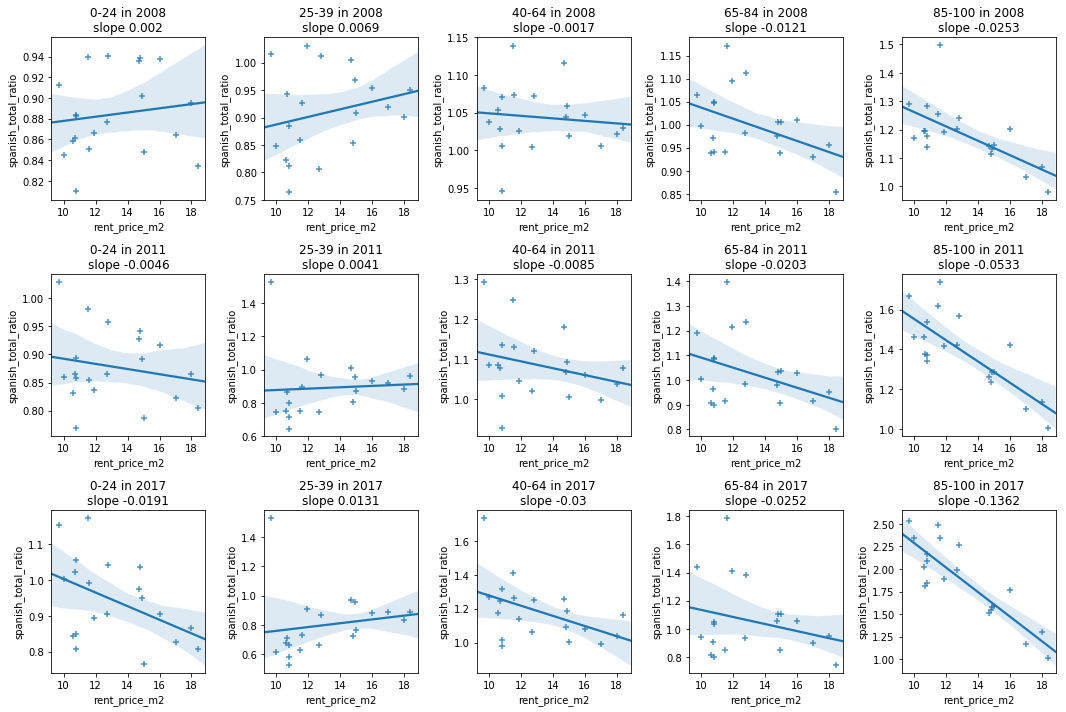

In [5]:
f = plt.figure(figsize=(15,10))
grid = plt.GridSpec(3, 5)
grid.get_subplot_params(fig=f)

plt.subplot(grid[0, 0])
plot_linear_regression(trends, 2008, '0-24', 'rent_price_m2')
plt.subplot(grid[0, 1])
plot_linear_regression(trends, 2008, '25-39', 'rent_price_m2')
plt.subplot(grid[0, 2])
plot_linear_regression(trends, 2008, '40-64', 'rent_price_m2')
plt.subplot(grid[0, 3])
plot_linear_regression(trends, 2008, '65-84', 'rent_price_m2')
plt.subplot(grid[0, 4])
plot_linear_regression(trends, 2008, '85-100', 'rent_price_m2')
plt.subplot(grid[1, 0])
plot_linear_regression(trends, 2011, '0-24', 'rent_price_m2')
plt.subplot(grid[1, 1])
plot_linear_regression(trends, 2011, '25-39', 'rent_price_m2')
plt.subplot(grid[1, 2])
plot_linear_regression(trends, 2011, '40-64', 'rent_price_m2')
plt.subplot(grid[1, 3])
plot_linear_regression(trends, 2011, '65-84', 'rent_price_m2')
plt.subplot(grid[1, 4])
plot_linear_regression(trends, 2011, '85-100', 'rent_price_m2')
plt.subplot(grid[2, 0])
plot_linear_regression(trends, 2017, '0-24', 'rent_price_m2')
plt.subplot(grid[2, 1])
plot_linear_regression(trends, 2017, '25-39', 'rent_price_m2')
plt.subplot(grid[2, 2])
plot_linear_regression(trends, 2017, '40-64', 'rent_price_m2')
plt.subplot(grid[2, 3])
plot_linear_regression(trends, 2017, '65-84', 'rent_price_m2')
plt.subplot(grid[2, 4])
plot_linear_regression(trends, 2017, '85-100', 'rent_price_m2')
plt.tight_layout()

* The oldest population experimented the strongest increase in cheaper districts after the crisis. The rate of retired population also increased in these districts. However, this was a behavior observed before and during the crisis.
* On the other hand, the level of adult citizens was similar in all type of districts before the crisis. Afterwards, there is a trend to increase the population in cheaper districts.
* The early adults, there is a decrease of the population in cheaper districts and no significant changes in reacher districts after the crisis.
* Surprisingly, is in the youngest sector of the population where we see an increase of the population in cheaper districts whereas it decrease in the more expensive ones. Most likely, the adquisitive level of families decrease with the crisis and there is a general flow to cheaper districts.


#### Effect of educational level on variation of the population per districts before, during and "after" the crisis

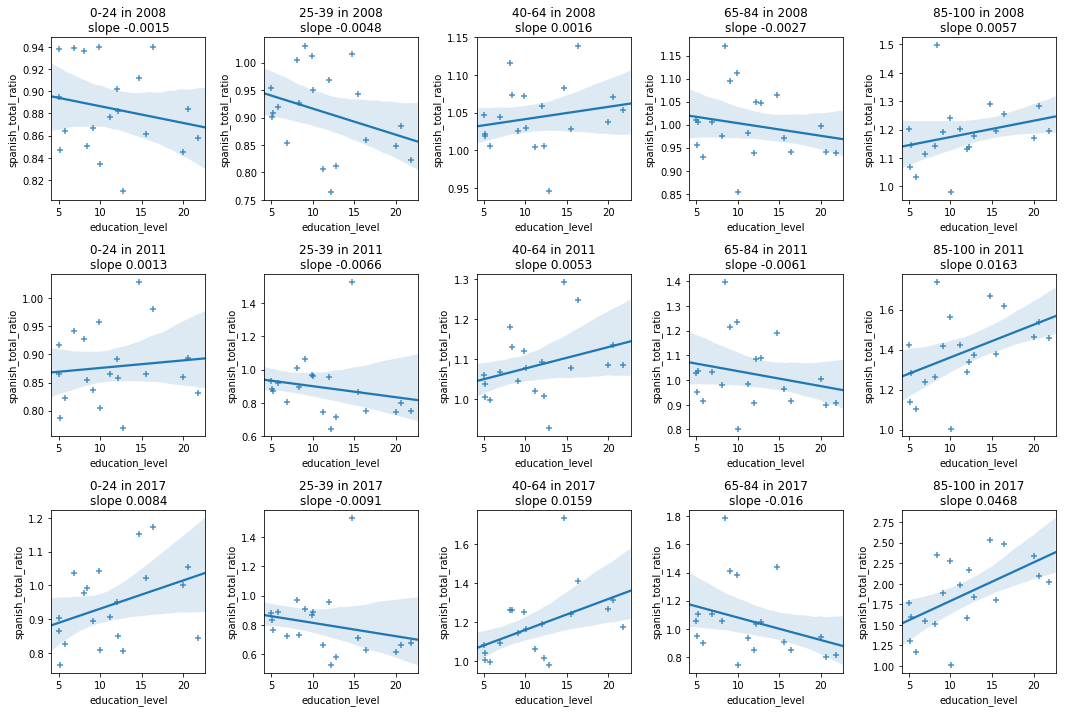

In [6]:
f = plt.figure(figsize=(15,10))
grid = plt.GridSpec(3, 5)
grid.get_subplot_params(fig=f)

plt.subplot(grid[0, 0])
plot_linear_regression(trends, 2008, '0-24', 'education_level')
plt.subplot(grid[0, 1])
plot_linear_regression(trends, 2008, '25-39', 'education_level')
plt.subplot(grid[0, 2])
plot_linear_regression(trends, 2008, '40-64', 'education_level')
plt.subplot(grid[0, 3])
plot_linear_regression(trends, 2008, '65-84', 'education_level')
plt.subplot(grid[0, 4])
plot_linear_regression(trends, 2008, '85-100', 'education_level')
plt.subplot(grid[1, 0])
plot_linear_regression(trends, 2011, '0-24', 'education_level')
plt.subplot(grid[1, 1])
plot_linear_regression(trends, 2011, '25-39', 'education_level')
plt.subplot(grid[1, 2])
plot_linear_regression(trends, 2011, '40-64', 'education_level')
plt.subplot(grid[1, 3])
plot_linear_regression(trends, 2011, '65-84', 'education_level')
plt.subplot(grid[1, 4])
plot_linear_regression(trends, 2011, '85-100', 'education_level')
plt.subplot(grid[2, 0])
plot_linear_regression(trends, 2017, '0-24', 'education_level')
plt.subplot(grid[2, 1])
plot_linear_regression(trends, 2017, '25-39', 'education_level')
plt.subplot(grid[2, 2])
plot_linear_regression(trends, 2017, '40-64', 'education_level')
plt.subplot(grid[2, 3])
plot_linear_regression(trends, 2017, '65-84', 'education_level')
plt.subplot(grid[2, 4])
plot_linear_regression(trends, 2017, '85-100', 'education_level')
plt.tight_layout()

* The good news is that after the crisis the trend change from negative to positive in the amount of citizens that have higher education in the youngest sector of the population.
* The bad news is that the trend of early adults kept decreasing so the amount of citizens with lower education decreased even more. The population of retired people follow the similar trend.
* Finally, the adults and oldest sector of the population increased significantly after the crisis in those districts with higher education. In any case, this trend was also ascendent before and during the crisis.